we are about to scrap reddit using this script developed in python.
we are specifically going to scrap the latest 100 post on **r/india/ with all the metadata**

# importing libraries

In [43]:
import pandas as pd # python pandas library which is basically 'excel on steroids'
import praw # also known as python reddit api wrapper, makes the task of accessing reddit data much easier
                         # can be installed using conda install -c conda-forge praw
import datetime as dt # needed since reddit uses unix timestamps

# logging in 

In [44]:
reddit = praw.Reddit(client_id='wCRCJc8W5u7A0A', \
                     client_secret='kVZmWORN37ntuck5imIQX_7-1vk', \
                     user_agent='python reddit scrapper', \
                     username='Sam_tyagi', \
                     password='AMDVISIONA8#') # sensitive info removed 

# accessing the subreddit

In [45]:
subreddit = reddit.subreddit('India')

# accessing the threads

each subreddit has different ways of organising topics.
we will be needing only the 'new' topics

In [46]:
x = []
latest = subreddit.new(limit = 1000) # by default it returns only the 100 submission samples
x = x.append(latest)

# scrapping and downloading data

first we need a place to store our data.
we will do that with the help of a dictionary

In [47]:
topics = { "title":[],
                "score":[],
                "id":[], "url":[],
                "comms_num": [],
                "created": [],
                "body":[],
         "upvote_ratio":[],
         "over_18":[]}

In [48]:
# all the attributes for submissions class can be found here https://praw.readthedocs.io/en/latest/code_overview/models/submission.html
for submission in latest:
    topics["title"].append(submission.title)
    topics["score"].append(submission.score)
    topics["id"].append(submission.id)
    topics["url"].append(submission.url)
    topics["comms_num"].append(submission.num_comments)
    topics["created"].append(submission.created)
    topics["body"].append(submission.selftext)
    topics["upvote_ratio"].append(submission.upvote_ratio)
    topics["over_18"].append(submission.over_18)
    

# converting the dictionary object to the dataframe object

In [17]:
india_latest = pd.DataFrame(topics)

In [18]:
# viewing the data
india_latest.head(5)

,title,score,id,url,comms_num,created,body,upvote_ratio,over_18
0,"Orbiter has fuel for 7 years, may spot Vikram ...",16,d15ios,https://m.timesofindia.com/india/orbiter-has-f...,0,1.567940e+09,,1.0,False
1,"Dear India, What is for breakfast today?",4,d15ikx,https://www.reddit.com/r/india/comments/d15ikx...,10,1.567940e+09,* half a liter of water first thing after waki...,1.0,False
2,Modi Govt had cuts back incentives for ISRO sc...,5,d15fiu,https://hwnews.in/news/national-news/govt-cuts...,1,1.567939e+09,,1.0,False
3,'NRC breaches citizenship act and is unconstit...,8,d15bua,https://youtu.be/D31rnvMBxDc,1,1.567939e+09,,1.0,False
4,Pune man attacked over mandal donation,2,d15bgu,https://www.hindustantimes.com/pune-news/pune-...,0,1.567939e+09,,1.0,False


reddit uses UNIX timestamp which is not a very convenient in terms of human readablity. 
we will convert it to standard datetime format using datetime library

# more info about unix timestamp


refer [Unix timestamp knowledge base](https://en.wikipedia.org/wiki/Unix_time)

In [19]:
def changeformat(created):
    return dt.datetime.fromtimestamp(created) # this function is used to convert unix timestamp to normal one

In [20]:
# applying function to created column
india_latest['created'] =  india_latest['created'].apply(changeformat)

In [21]:
# checking for the changes
india_latest

,title,score,id,url,comms_num,created,body,upvote_ratio,over_18
0,"Orbiter has fuel for 7 years, may spot Vikram ...",16,d15ios,https://m.timesofindia.com/india/orbiter-has-f...,0,2019-09-08 16:18:36,,1.00,False
1,"Dear India, What is for breakfast today?",4,d15ikx,https://www.reddit.com/r/india/comments/d15ikx...,10,2019-09-08 16:18:18,* half a liter of water first thing after waki...,1.00,False
2,Modi Govt had cuts back incentives for ISRO sc...,5,d15fiu,https://hwnews.in/news/national-news/govt-cuts...,1,2019-09-08 16:10:02,,1.00,False
3,'NRC breaches citizenship act and is unconstit...,8,d15bua,https://youtu.be/D31rnvMBxDc,1,2019-09-08 16:00:21,,1.00,False
4,Pune man attacked over mandal donation,2,d15bgu,https://www.hindustantimes.com/pune-news/pune-...,0,2019-09-08 15:59:19,,1.00,False
5,Govt to spend Rs 3.5 lakh cr on mega water sch...,0,d14wff,https://timesofindia.indiatimes.com/india/govt...,0,2019-09-08 15:19:32,,0.33,False
6,"Coming Soon, Hygiene Ratings On Restaurant Doo...",20,d14qht,https://food.ndtv.com/news/coming-soon-hygiene...,3,2019-09-08 15:03:57,,1.00,False
7,Trolls attacking Netflix for being ‘Hindu-phob...,14,d13iyw,https://www.theprint.in/features/trolls-attack...,4,2019-09-08 13:11:31,,0.82,False
8,"Kashmir photojournalist hit with pellets, 3 ot...",3,d12yj6,https://theprint.in/india/kashmir-photojournal...,0,2019-09-08 12:22:21,,0.63,False
9,How the East India Company became the world's ...,2,d12wqd,https://www.nationalgeographic.com/culture/top...,0,2019-09-08 12:18:29,,0.67,False


# saving data to csv
  

In [22]:
india_latest.to_csv('reddit_scrapping.csv', index = False)

# bonus
correlation visualisation of upvote_ratio and score

In [23]:
# importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [24]:
# loading the csv file back 
df= pd.read_csv('reddit_scrapping.csv', usecols = ['score', 'upvote_ratio'])

No handles with labels found to put in legend.


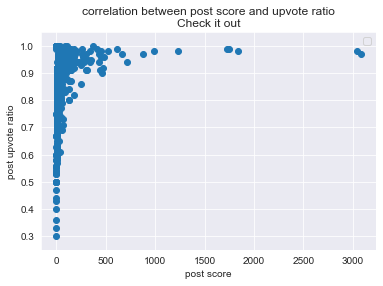

the correlation value of 0.20999338247517554 explains that there is little to no correlation between the two factors


In [25]:
# visualisation 
# correlation b/w upvote_ratio and post score
plt.scatter(df.score ,df.upvote_ratio ,) # s is the size of the markers(the dots)
plt.xlabel('post score')
plt.ylabel('post upvote ratio')
plt.legend()

plt.title('correlation between post score and upvote ratio\nCheck it out')
plt.show()
print("the correlation value of {} explains that there is little to no correlation between the two factors".format(df.upvote_ratio.corr(df.score)))

list